In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Exercise_1").master("spark://spark-master:7077").getOrCreate()
sc = spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/09 01:16:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/usr/local/lib/python3.7/dist-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


# Exercise 1 


the file <u>./support/english.stop.txt</u> contains a list of English stopwords, 
while the file <u>./shakes/juliuscaesar.txt</u> contains the entire text of Shakespeare's 'Julius Caesar'.

 - Load all of the stopwords into a Python list
 - Load the text of Julius Caesar into an RDD using the sparkcontext.textfile() method. Call it juliusrdd.

In [2]:
# Reading and cleaning Stop Words 
with open("support/english.stop.txt") as stop_words_list:
    words = stop_words_list.readlines()
stop_words = [x.strip() for x in words]

# Creating RDD with Julius Caesar Text
juliusRDD = sc.textFile("shakes/juliuscaesar.txt")

In [3]:
# Question 1 : How many Words does Julius Caesar Have ? ---- > use flatMap()
import re

No_Words_JC = juliusRDD.flatMap(lambda line: line.split(" ")) \
    .map(lambda x: re.sub(r"[^a-zA-Z']","",x))  \
    .map(lambda x: x.lower()) \
    .filter(lambda x: x != "") \
    .count()
# flatMap(lambda line: line.split(" "))     ---------------- > Reads every single word as item separated by a space " " 
# map(lambda x: re.sub(r"[^a-zA-Z']","",x)) ---------------- > Cleans the RDD off items that ar not alphabetic
# map(lambda x: x.lower())                  ---------------- > Converts Everthing to lowercase
# .filter(lambda x: x != "")                ---------------- > Filters out  elements equal to ""
print(f"There are {No_Words_JC} in Julius Caesar")

There are 21185 in Julius Caesar


In [4]:
# Question 2 : Print the first 20 Words in Julius Caesar
first_20_JC = juliusRDD.flatMap(lambda line: line.split(" ")) \
    .map(lambda f : re.sub(r"[^a-zA-Z']","",f)) \
    .map(lambda e : e.lower()) \
    .filter(lambda c : c!="") \
    .take(20)
print(f"The 20 first words in Julius Caesar are : {first_20_JC}")

The 20 first words in Julius Caesar are : ['the', 'tragedy', 'of', 'julius', 'caesar', 'by', 'william', 'shakespeare', 'dramatis', 'personae', 'julius', 'caesar', 'roman', 'statesman', 'and', 'general', 'octavius', 'triumvir', 'after', "caesar's"]


In [5]:
# Question 3 Print the first 20 Words in Julius Caesar AFTER REMOVING THE STOP WORDS
first_20_rm_JC = juliusRDD.flatMap(lambda l: l.split(" ")) \
    .map(lambda w : re.sub(r"[^a-zA-Z']","",w)) \
    .map(lambda r : r.lower()) \
    .filter(lambda c : c!="") \
    .filter(lambda d : d not in stop_words ).take(20)
print(f"The first 20 words without stopwords are :{first_20_rm_JC}")

The first 20 words without stopwords are :['tragedy', 'julius', 'caesar', 'william', 'shakespeare', 'dramatis', 'personae', 'julius', 'caesar', 'roman', 'statesman', 'general', 'octavius', 'triumvir', "caesar's", 'death', 'augustus', 'caesar', 'emperor', 'rome']


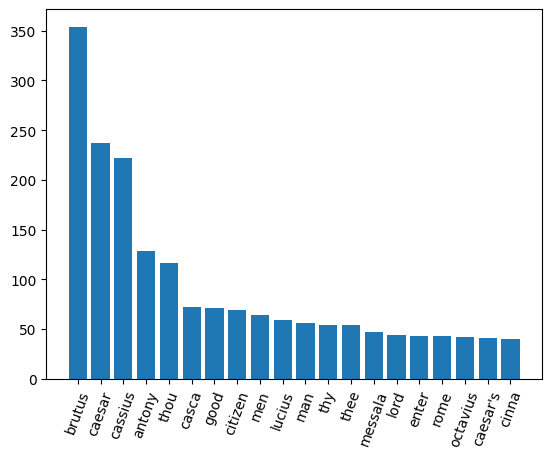

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,brutus,caesar,cassius,antony,thou,casca,good,citizen,men,lucius,man,thy,thee,messala,lord,enter,rome,octavius,caesar's,cinna
count,354,237,222,128,116,72,71,69,64,59,56,54,54,47,44,43,43,42,41,40


In [6]:
# Question 4 : Plot a bar graph. For each of the top 20 words on the X axis, represent the count on the Y axis.
import matplotlib.pyplot as plt
import pandas as pd

most_used_20 = juliusRDD.flatMap(lambda line : line.split(" ")) \
    .map(lambda c :  re.sub("[^a-zA-Z']","",c)) \
    .map(lambda v : v.lower()) \
    .filter(lambda x : x not in stop_words) \
    .filter(lambda c : c != "") \
    .map(lambda word : (word,1)) \
    .reduceByKey(lambda a,b : a+b) \
    .takeOrdered(20, key = lambda x : -x[-1])

w = [x[0] for x in  most_used_20]
c = [x[1] for x in  most_used_20]

fig = plt.bar(x = w, height = c)
plt.xticks(w, rotation = 70)
plt.show()

pd.DataFrame({"word":w,"count":c}).T



In [7]:
spark.stop()